In [46]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Homepage: https://guilherme.readthedocs.io/en/latest/
# GitHub: https://github.com/jgmsantos

In [47]:
df1 = pd.read_csv('https://queimadas.dgi.inpe.br/home/downloadfile?path=%2Fapp%2Fapi%2Fdata%2Fdados_abertos%2Ffocos%2FDiario%2Ffocos_abertos_24h_20230701.csv')

In [48]:
df1.columns

Index(['id', 'lat', 'lon', 'data_hora_gmt', 'satelite', 'municipio', 'estado',
       'pais', 'municipio_id', 'estado_id', 'pais_id', 'numero_dias_sem_chuva',
       'precipitacao', 'risco_fogo', 'bioma', 'frp', 'geom'],
      dtype='object')

In [49]:
df1[['lat', 'lon']]

,lat,lon
0,-5.92687,146.96381
1,42.59096,23.10293
2,41.24149,36.46245
3,41.10972,37.32224
4,41.02364,36.09737
...,...,...
143604,-17.28893,26.88103
143605,-19.40464,29.95582
143606,-19.40137,29.96215
143607,-16.27238,18.85598


In [50]:
# Converte os pontos para geometry.
gdf2 = gpd.GeoDataFrame(df1, geometry=gpd.points_from_xy(df1.lon, df1.lat))

In [51]:
gdf2

,id,lat,lon,data_hora_gmt,satelite,municipio,estado,pais,municipio_id,estado_id,pais_id,numero_dias_sem_chuva,precipitacao,risco_fogo,bioma,frp,geom,geometry
0,d28a8a0a-be9f-3f60-a559-d832a3f4eb57,-5.92687,146.96381,2023-07-01 00:01:00,TERRA_M-M,Tewae-Siassi,Morobe,Papua New Guinea,64,14,175,NaN,NaN,NaN,NaN,7.2,0101000020E6100000D9B11188D75E6240F792C6681DB5...,POINT (146.96381 -5.92687)
1,2be1786e-0485-383c-9950-47292c4140a0,42.59096,23.10293,2023-07-01 00:01:00,NPP-375D,Pernik,Pernik,Bulgaria,101,12,37,NaN,NaN,NaN,NaN,0.7,0101000020E6100000FCC6D79E591A3740419FC893A44B...,POINT (23.10293 42.59096)
2,840b51a2-bc3d-35cd-9b16-c44bc4391236,41.24149,36.46245,2023-07-01 00:01:00,NPP-375D,Tekkeköy,Samsun,Turkey,783,67,235,NaN,NaN,NaN,NaN,7.7,0101000020E61000008104C58F313B4240D027F224E99E...,POINT (36.46245 41.24149)
3,bee17f1e-185c-3df7-944d-6b726817d9ec,41.10972,37.32224,2023-07-01 00:01:00,NPP-375D,Ünye,Ordu,Turkey,726,63,235,NaN,NaN,NaN,NaN,0.7,0101000020E610000045BB0A293FA94240CBDB114E0B8E...,POINT (37.32224 41.10972)
4,f0469e92-946b-354d-929f-1c29f0e32793,41.02364,36.09737,2023-07-01 00:01:00,NPP-375D,Kavak,Samsun,Turkey,778,67,235,NaN,NaN,NaN,NaN,0.6,0101000020E610000046CEC29E760C42405070B1A20683...,POINT (36.09737 41.02364)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143604,0867cd36-e741-38f2-96d9-8b0c99f872e0,-17.28893,26.88103,2023-07-01 23:58:00,NPP-375,Kalomo,Southern,Zambia,58,9,255,NaN,NaN,NaN,NaN,2.1,0101000020E61000007DCB9C2E8BE13A4052D50451F749...,POINT (26.88103 -17.28893)
143605,e66eed45-e986-3921-8ab0-301c4f4539be,-19.40464,29.95582,2023-07-01 23:58:00,NPP-375,Gweru,Midlands,Zimbabwe,56,10,256,NaN,NaN,NaN,NaN,0.8,0101000020E6100000DBDC989EB0F43D4048A7AE7C9667...,POINT (29.95582 -19.40464)
143606,6b039c31-022b-3a4a-bf1a-ed0ef2c10e05,-19.40137,29.96215,2023-07-01 23:58:00,NPP-375,Gweru,Midlands,Zimbabwe,56,10,256,NaN,NaN,NaN,NaN,2.2,0101000020E6100000AED85F764FF63D4074982F2FC066...,POINT (29.96215 -19.40137)
143607,a43f5cee-73e9-347c-b5ad-2a0183a54953,-16.27238,18.85598,2023-07-01 23:58:00,NPP-375,Nancova,Cuando Cubango,Angola,35,5,8,NaN,NaN,NaN,NaN,1.4,0101000020E6100000B3075A8121DB3240A01518B2BA45...,POINT (18.85598 -16.27238)


In [52]:
# Filtra somente o país Brasil da coluna 'pais' geodataframe.
brasil = gdf2.loc[gdf2['pais'] == 'Brasil']

In [53]:
brasil.satelite

236        MSG-03
300       GOES-16
301       GOES-16
302       GOES-16
303       GOES-16
           ...   
142049    GOES-16
143227    GOES-16
143228    GOES-16
143229    GOES-16
143230    GOES-16
Name: satelite, Length: 6828, dtype: object

In [54]:
# Nome dos satélites utilizados.
set(brasil.satelite)

{'AQUA_M-M',
 'AQUA_M-T',
 'GOES-16',
 'MSG-03',
 'NOAA-18',
 'NOAA-18D',
 'NOAA-19',
 'NOAA-19D',
 'NOAA-20',
 'NPP-375',
 'NPP-375D',
 'TERRA_M-M',
 'TERRA_M-T'}

In [55]:
print(f'Total de satélites: {len(set(brasil.satelite))}')

Total de satélites: 13


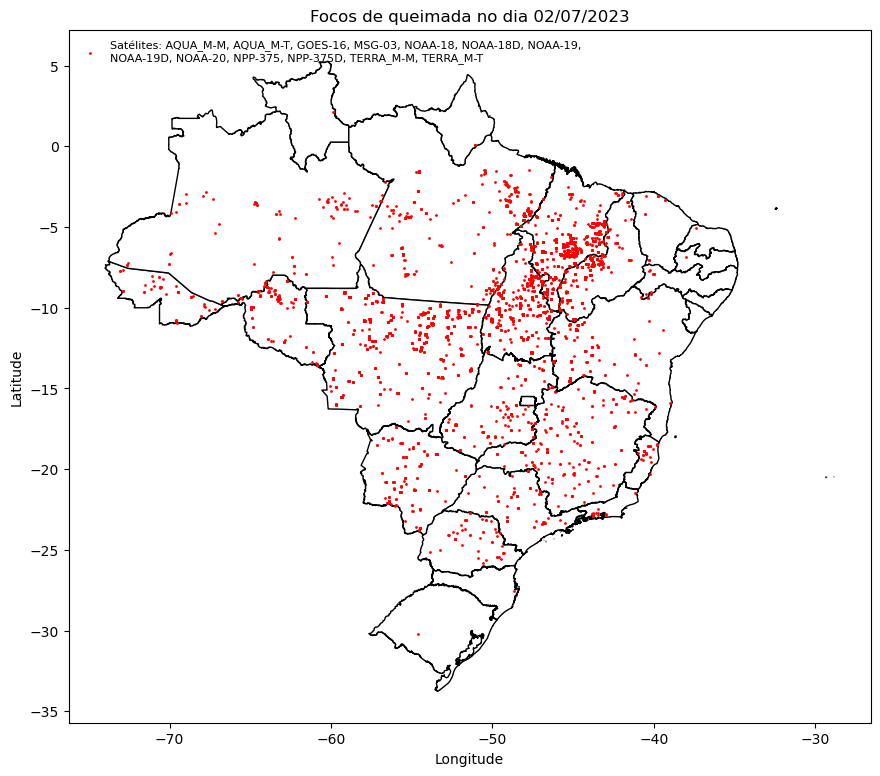

In [56]:
shapefile_brasil = gpd.read_file('../../../base_dados/shapefile/Brasil/Brasil_estados/BRUFE250GC_SIR.shp')

# color='white' -> cor do fundo do mapa.
# edgecolor='red' -> cor da linha do país.
ax = shapefile_brasil.plot(color='white', figsize=(12, 9), edgecolor='black')

brasil.plot(ax=ax, color='red', markersize=1, label='Satélites: AQUA_M-M, AQUA_M-T, GOES-16, MSG-03, NOAA-18, NOAA-18D, NOAA-19, \nNOAA-19D, NOAA-20, NPP-375, NPP-375D, TERRA_M-M, TERRA_M-T')

plt.title('Focos de queimada no dia 02/07/2023')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.legend(loc="upper left", frameon=False, fontsize=8)

plt.show()